# The Night That Taggart and I Reversed Nimble.exe

To finish this presentation, let me tell you a story.

January 5th, 2022. John Hammond tweets the following:

![johntweet](../assets/NimbleAVExcursion/johntweet.png)

Upon closer inspection, John is attempting to download Nim version 1.6.2 (the current stable build as of writing this). And this download has triggered an alert from Windows Defender.

## The Problem
The Windows Nim language installation executables, for some reason, trigger Windows Defender in certain versions. John's tweet shows that the install binaries for the current Nim package triggers antivirus but this problem extends back several versions. I was made aware of this after I wrote a blog post about performing process injection with Nim and received a comment about the post:

![blogpost](../assets/NimbleAVExcursion/blogpost.png)

I think this comment highlights the principal issue here.

Even before performing the research for this, I had a feeling that the Nim binaries were not compromised or backdoored. I expected this to be a false positive. And I reflected on what that would mean for the developers of the language.

Imagine you're the developer of Nim and have put (according to the GitHub page) just shy of 20k commits to the codebase. You're working to provide an open-source language that can serve multiple purposes. And Windows Defender aggros on your compiled executables and scares people away from using your language. This, to me, felt incredibly unfair.

So on the night of Oct 26th, 2021, Taggart and I decided to examine the binaries to determine the truth, either to excuplate or to identify a security issue.

![experimentstart](../assets/NimbleAVExcursion/start.png)

## The Experiment

![experimentstart](../assets/NimbleAVExcursion/stream.png)

The experiment was set up like this:
- Identify a Nim language installation binary that triggers Windows Defender
- Reliably recreate the Defender alert
- Deploy AV analysis and reverse engineering techniques to find the bytes of Defender that were triggering

### Objectives
- Determine the existence of malicious code in the Nimble executable.
- Determine if the Defender alert is a false positive.
- If it is a false positive, determine the specific part of the executable that triggers AV alerts.


### Hypothesis
My hypothesis was that there would be certain API calls that, once resolved and executed, Defender would identify as malicious.

### Subject
Nimble.exe install binary 1.4.8 x64

Nimble is the one-stop utility for Nim package development. Among many, many other uses, Nimble is used to download Nim packages during development. 

### Tools
- FLARE-VM
- Get-FileHash
- VirusTotal
- ThreatCheck
- HxD
- FLOSS
- PEStudio
- x64dbg
- Defender alert logs
- Hatching Triage (https://tria.ge)

### Methods
Basic Static Analysis
- Pull hash and submit to Virustotal
- Examine strings with FLOSS
- Submit sample to Hatching Triage
- Examine in PEStudio
- Use ThreatCheck to identify the bytes that are triggering Defender
- Use HxD to examine the triggering bytes

Advanced Dynamic Analysis
- Debug Nimble.exe in x64dbg and set breakpoints to determine the precise instruction that triggers Defender.

### Full Stream
[#AttackOnTuesday - Nim vs. Defender w/HuskyHacks!](https://youtu.be/suKfsnOa_OU?t=570)


---

## Results
I did not draw conclusive results the night of the stream but continued research the following day (Oct 27th,2021). My findings included the following:

### **Existence of malicious code in the Nimble binary**
I was unable to prove the existence of malicious code in the binary.

### **Malicious code in Nimble would be extremely unlikely**
The applied tools and methodology was enough to reasonably conclude that the existence of malicious code in the Nimble binary would be extremely unlikely.

### **Hypothesis: Windows APIs Triggering Defender**
My research identified the root cause of Nimble's Defender alerts as the syscall of **NtTerminateProcess** located at the exit of the program.

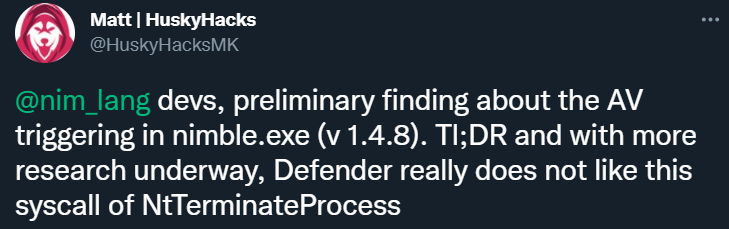

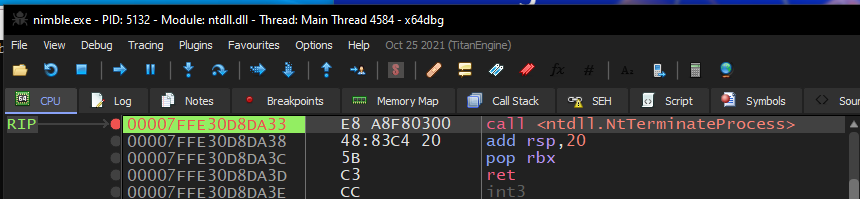

*Above: call instruction in ntdll.dll to NtTerminateProcess*

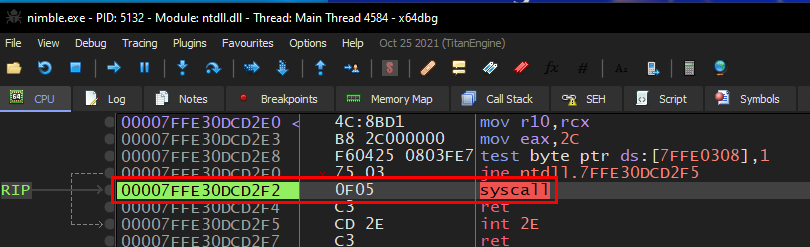

*Above: the syscall instruction for the identified call to NtTerminateProcess*

By setting breakpoints on the above instructions, I was able to reliably recreate Defender alerts when executing the instructions.

---

# Follow On

I relayed my findings to the Nim developers and they were very appreciative of the research.

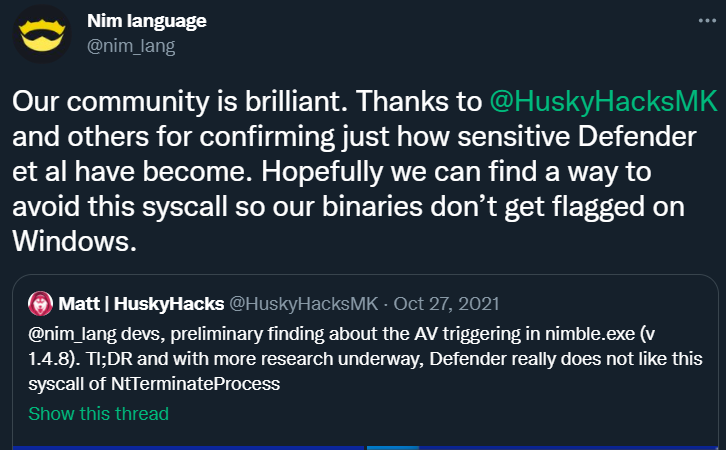

It was unclear to me how the devs might go about removing that syscall, or even if it would be necessary to do so. I am not a language developer and have little understanding of how much control a dev would have over the ASM level instructions that occur during the compilation of the language binary. More research needs to be done to detemrine if there is a way to avoid this syscall.

I also was curious about the syscall itself and why Defender might flag on it. My original hypothesis was that, due to its method of execution, calling the API via ntdll and a direct syscall may trigger antivirus due to its similarities to other contemporary red team tradecraft. Syscall execution of the NTDLL APIs is a popular tactic to bypass EDR and antivirus as it allows the threat actor to perform post-compromise activity without calling hooked APIs in user land.

However, one of my colleagues sent the following paper to me after learning about the stream: [Early detection of crypto-ransomware using pre-encryption detection algorithm](https://www.sciencedirect.com/science/article/pii/S1319157820304122) (Authors: S.H. Kok, Azween Abdullah, NZ Jhanjhi)

This paper covers early detection mechanisms of crypto-ransomware by employing an algorithm that scores characteristics of a program in different categories. One of these categories includes API calls. The paper includes a list of API calls that are commonly present in ransomware but 

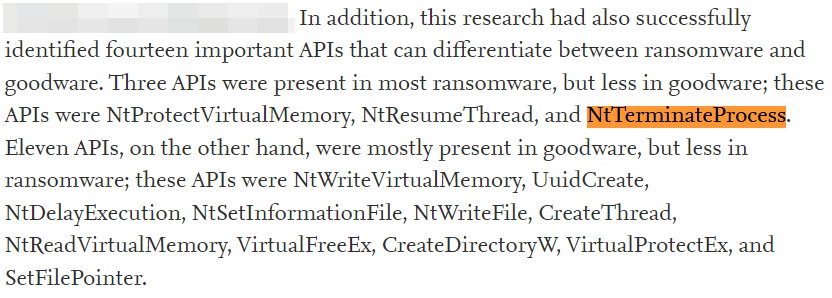

---
## [Previous: Nim's Offensive Applications](OffensiveNim.ipynb) ||--0--|| [Next: Conclusion](Conclusion.ipynb)